<a id='the_destination10'></a>
# Исследование рынка общественного питания Москвы

Исследование целесообразности открытия оригинального кафе в Москве. Фишка кафе - посетителей будут обслуживать роботы. Необходимо привлечение инвесторов.

**Цель исследования** - изучение и анализ текущего рынка общественного питания Москвы.

Для достижения поставленной цели необходимо решить следующие задачи:
1. [Загрузить и изучить открытые данные заведений общественного питания Москвы](#the_destination1) 
2. Проанализировать данные:
  - [Исследовать соотношение видов объектов общественного питания по количеству](#the_destination2) 
  - [Исследовать соотношение сетевых и несетевых заведений по количеству](#the_destination3) 
  - [Выяснить для какого вида объекта общественного питания характерно сетевое распространение](#the_destination4) 
  - [Выяснить, что характерно для сетевых заведений по количеству посадочных мест](#the_destination5) 
  - [Расчитать среднее количество посадочных мест для каждого вида объекта общественного питания](#the_destination6) 
  - [Составить Топ-10 улиц по количеству объектов общественного питания](#the_destination7) 
  - [Составить список улиц с одним объектом общественного питания](#the_destination8) 
3. [Общий вывод и рекомендации](#the_destination9) 


<a id='the_destination1'></a>
### Загрузим и изучим открытые данные заведений общественного питания Москвы

In [100]:
#загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.context('saeborn_talk');

Для исследования предоставлены следующие данные: /datasets/rest_data.csv.

In [101]:
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Данные содержат таблицу rest_data, состоящую из нескольких колонок:  
id — идентификатор объекта;  
object_name — название объекта общественного питания;  
chain — сетевой ресторан;  
object_type — тип объекта общественного питания;  
address — адрес;  
number — количество посадочных мест.  

Тип заголовков одинаковый, приемлемый.

In [102]:
#изучение типа данных по коланкам
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Тип данных подходящий.

In [103]:
#изучим уникальные значения тип объекта общественного питания
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [104]:
#изучим варианты колонки 'сетевой ресторан'
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [105]:
#проверим наличие пропущенных значений
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [106]:
#приведем колонку object_name к единому регистру
rest_data['object_name'] = rest_data['object_name'].str.lower() 

In [107]:
duplicates = rest_data[rest_data.drop('id', axis=1).duplicated()]
duplicates = duplicates['id']

Пропущенные значения отсутствуют. Найдено 85 полных совпадений. Удалим.

In [108]:
rest_data = rest_data.query('id != @duplicates')
rest_data

C:\Users\Asano\AppData\Local\Temp\ipykernel_3924\663823951.py:1: PerformanceWarning: Alignment difference on axis 0 is larger than an order of magnitude on term '__pd_eval_local_duplicates', by more than 4.184; performance may suffer.
  rest_data = rest_data.query('id != @duplicates')


,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [109]:
rest_data['number'].describe()

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [110]:
rest_data.query('number == 1700')

,id,object_name,chain,object_type,address,number
12723,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


In [111]:
rest_data.query('number == 0').groupby('object_type').agg({'number':'count'}).sort_values(by='number', ascending=False)

,number
object_type,
предприятие быстрого обслуживания,690
кафе,306
закусочная,181
магазин (отдел кулинарии),145
кафетерий,111
буфет,64
ресторан,44
бар,28
столовая,19


При изучении данных колонки number выявили крайние значения: 0 - что характерно для предприятий быстрого обслуживания и странно для кафе. Максимальное значение 1700 - бар arena by soho family - действительно имеет большую вместимость.

### Анализ данных

<a id='the_destination2'></a>
#### Исследуем соотношение видов объектов общественного питания по количеству

In [112]:
object_type_count= rest_data.groupby('object_type').agg({'id':'count'})
object_type_count.columns=['id_count']
object_type_count = object_type_count.sort_values(by='id_count', ascending=False)
object_type_count

,id_count
object_type,
кафе,6071
столовая,2584
ресторан,2282
предприятие быстрого обслуживания,1897
бар,855
буфет,576
кафетерий,395
закусочная,348
магазин (отдел кулинарии),273


In [113]:
object_type_count_sum = object_type_count['id_count'].sum()
object_type_count_sum
 

15281

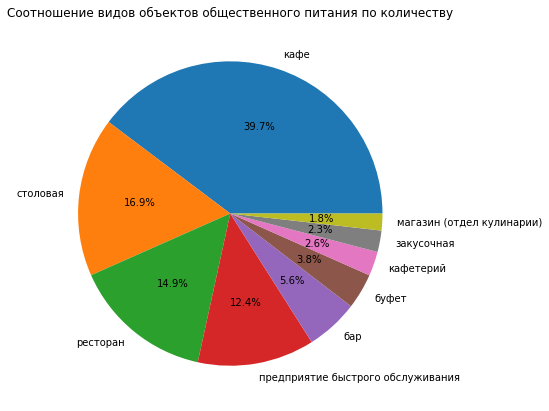

In [114]:
object_type_count.plot(kind='pie', 
                       label='',
                       autopct='%1.1f%%', 
                       legend=False, y='id_count', 
                       figsize=(7, 7), 
                       title='Соотношение видов объектов общественного питания по количеству')
plt.show();

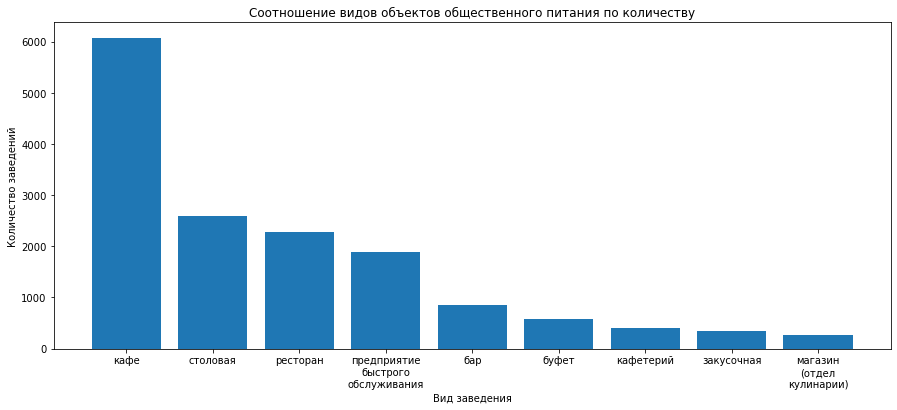

In [115]:
object_type_count = object_type_count.reset_index()

fig = plt.figure(figsize=(15,6))
plt.bar(object_type_count['object_type'], object_type_count['id_count'])
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xlabel('Вид заведения')
plt.ylabel('Количество заведений')
old_ticks, old_labels = plt.xticks() 

fig.canvas.draw()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels])
plt.show();

Большую долю среди всех заведений общественного питания Москвы занимает - кафе. На втором месте столовая, с небольшим отрывом на третьем - ремтораны. Меньше всего кулинарии и закусочные.

<a id='the_destination3'></a>
#### Исследуем соотношение сетевых и несетевых заведений по количеству

In [116]:
object_chain = rest_data.groupby('chain').agg({'id':'count'})
object_chain.columns=['id_count']
object_chain = object_chain.sort_values(by='id_count', ascending=False).reset_index()
object_chain['mean'] = object_chain['id_count']/object_chain['id_count'].sum()
object_chain

,chain,id_count,mean
0,нет,12317,0.806034
1,да,2964,0.193966


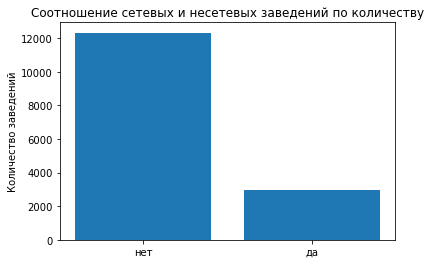

In [117]:
plt.bar(object_chain['chain'], object_chain['id_count'])
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.ylabel('Количество заведений')
plt.show();

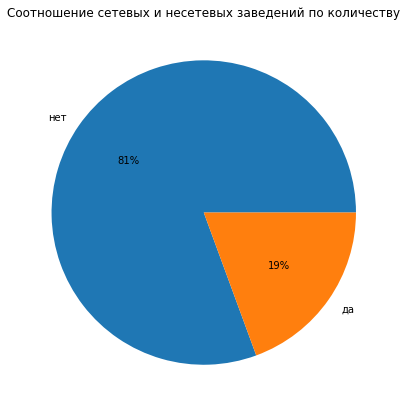

In [118]:
object_chain.set_index('chain').plot(kind='pie', 
                       label='',
                       autopct='%1.0f%%', 
                       legend=False, y='id_count', 
                       figsize=(7, 7), 
                       title='Соотношение сетевых и несетевых заведений по количеству')
plt.show();

81% заведений Москвы - несетевые. Доля сетевых, соответственно, всего 19%.

<a id='the_destination4'></a>
#### Выясним для какого вида объекта общественного питания характерно сетевое распространение

In [119]:
object_type_chain = rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
object_type_chain.columns=['chain_yes', 'chain_no']
object_type_chain['chain_sum'] = object_type_chain['chain_yes']+ object_type_chain['chain_no']
object_type_chain['chain_yes_mean'] = object_type_chain['chain_yes']/object_type_chain['chain_sum']
object_type_chain = object_type_chain.sort_values(by='chain_yes_mean', ascending=False).reset_index()
object_type_chain

,object_type,chain_yes,chain_no,chain_sum,chain_yes_mean
0,предприятие быстрого обслуживания,788,1109,1897,0.415393
1,магазин (отдел кулинарии),78,195,273,0.285714
2,ресторан,543,1739,2282,0.237949
3,кафе,1396,4675,6071,0.229946
4,закусочная,56,292,348,0.160920
5,кафетерий,52,343,395,0.131646
6,бар,37,818,855,0.043275
7,буфет,11,565,576,0.019097
8,столовая,3,2581,2584,0.001161


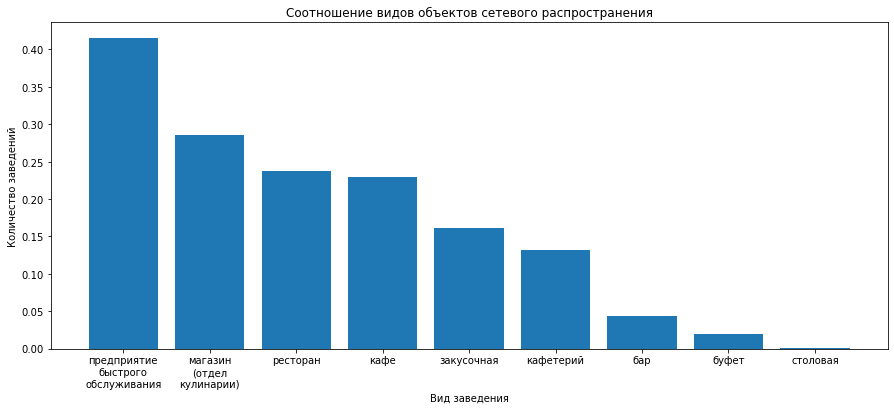

In [120]:
object_type_chain = object_type_chain.reset_index()

fig = plt.figure(figsize=(15,6))
plt.bar(object_type_chain['object_type'], object_type_chain['chain_yes_mean'])
plt.title('Соотношение видов объектов сетевого распространения')
plt.xlabel('Вид заведения')
plt.ylabel('Количество заведений')
old_ticks, old_labels = plt.xticks() 

fig.canvas.draw()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels])
plt.show();

Сетевой распространение с наибольшей долей характерно для бистро (42%), кулинарии (29%), ресторанов (24%), кафе (23%).

<a id='the_destination5'></a>
#### Выясним, что характерно для сетевых заведений по количеству посадочных мест

In [121]:
rest_data_yes = rest_data.query('chain == "да"')
object_type_number = rest_data_yes.pivot_table(index='object_name', columns='chain', values='number', aggfunc=['count', 'mean'])
object_type_number.columns=['count_numb', 'mean_numb']    
object_type_number= object_type_number.sort_values(by='count_numb', ascending=False).query('count_numb != 1')
object_type_number

,count_numb,mean_numb
object_name,,
шоколадница,157,57.184713
kfc,155,55.341935
макдоналдс,150,87.700000
бургер кинг,137,46.649635
теремок,94,25.606383
...,...,...
кафе «costa coffee»,2,20.500000
изба,2,17.500000
зодиак,2,72.000000


In [122]:
object_type_number['count_numb'].describe()

count    246.000000
mean      10.703252
std       22.638719
min        2.000000
25%        2.000000
50%        4.000000
75%        7.000000
max      157.000000
Name: count_numb, dtype: float64

Малое количество заведений в сети примем - до 10, большое - более 10.

In [123]:
object_type_number['mean_numb'].describe()

count    246.000000
mean      59.396081
std       49.548665
min        0.000000
25%       21.125000
50%       44.000000
75%       85.000000
max      258.666667
Name: mean_numb, dtype: float64

Малое количество посадочных мест примем - 59, большое - более 59.

Разобьём все сети на 4 категории:  
первая - сеть с большим числом посадочных мест и небольшим числом заведений в сети  
вторая - сеть с небольшим числом посадочных мест и большим числом заведений в сети
третья - сеть с небольшим числом посадочных мест и небольшим числом заведений в сети
четвертая - сеть с большим числом посадочных мест и большим числом заведений в сети

In [124]:
def category (row):
    count = row['count_numb']
    mean_numb = row['mean_numb']
    if count <= 10 and mean_numb > 59:
        return 'первая'
    if count > 10 and mean_numb <= 59:
        return 'вторая'
    if count <= 10 and mean_numb <= 59:
        return 'третья'
    if count > 10 and mean_numb > 59:
        return 'четвертая'

object_type_number['category'] = object_type_number.apply(category, axis=1)
object_type_number

,count_numb,mean_numb,category
object_name,,,
шоколадница,157,57.184713,вторая
kfc,155,55.341935,вторая
макдоналдс,150,87.700000,четвертая
бургер кинг,137,46.649635,вторая
теремок,94,25.606383,вторая
...,...,...,...
кафе «costa coffee»,2,20.500000,третья
изба,2,17.500000,третья
зодиак,2,72.000000,первая


In [125]:
object_type_number_categ = object_type_number.groupby('category').agg({'category':'count'})
object_type_number_categ.columns=['count_category']
object_type_number_categ = object_type_number_categ.sort_values(by='count_category', ascending=False).reset_index()
object_type_number_categ

,category,count_category
0,третья,117
1,первая,84
2,вторая,34
3,четвертая,11


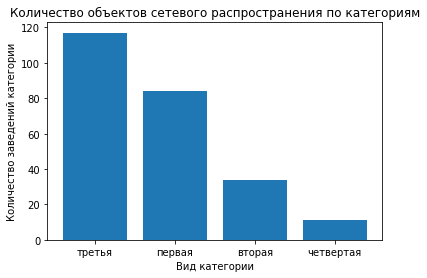

In [126]:
plt.bar(object_type_number_categ['category'], object_type_number_categ['count_category'])
plt.title('Количeство объектов сетевого распространения по категориям')
plt.ylabel('Количество заведений категории')
plt.xlabel('Вид категории')
plt.show();

Для сетевых заведений в большей степени характерна третья категория: сеть с небольшим числом посадочных мест (до 59) и небольшим числом заведений (до 10). На втором месте первая категория: сеть с большим числом посадочных мест и небольшим числом заведений в сети. Меньше всего сетевых заведений четвертой категории: сеть с большим числом посадочных мест и большим числом заведений в сети. 

<a id='the_destination6'></a>
#### Расчитаем среднее количество посадочных мест для каждого вида объекта общественного питания

In [127]:
object_type_number_avg = rest_data.pivot_table(index='object_type', values='number', aggfunc='mean')
object_type_number_avg.columns=['avg_number']
object_type_number_avg = object_type_number_avg.sort_values(by='avg_number', ascending=False).reset_index()
object_type_number_avg

,object_type,avg_number
0,столовая,130.337848
1,ресторан,96.884750
2,буфет,51.425347
3,бар,43.533333
4,кафе,39.785703
5,предприятие быстрого обслуживания,20.808645
6,кафетерий,9.184810
7,закусочная,7.847701
8,магазин (отдел кулинарии),5.589744


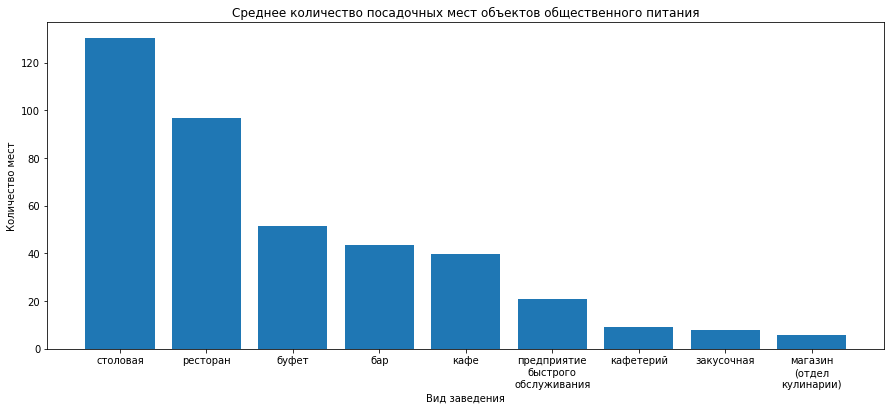

In [128]:
object_type_number_avg = object_type_number_avg.reset_index()

fig = plt.figure(figsize=(15,6))
plt.bar(object_type_number_avg['object_type'], object_type_number_avg['avg_number'])
plt.title('Среднее количество посадочных мест объектов общественного питания')
plt.xlabel('Вид заведения')
plt.ylabel('Количество мест')
old_ticks, old_labels = plt.xticks() 

fig.canvas.draw()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels])
plt.show();

Среди всех объектов общественного питания наибольшее число посадочных мест в среднем предоставляет столовая и ресторан (около 100 и более). Лидер по числу объектов - кафе, только на 5 месте (до 40).

<a id='the_destination7'></a>
#### Составим Топ-10 улиц по количеству объектов общественного питания

In [129]:
def street(row):
    address = row['address'] 
    name_street = [] 
    list_street = ['улица', 'бульвар', 'шоссе', 'переулок', 'проспект', 'проезд', 'площадь', 'набережная',
                   'квартал', 'аллея', 'микрорайон', 'Зеленоград', 'поселение', 'линия', 'тупик', 'километр',
                   'территория', 'просек']
    for n in row['address'].split(sep=', '):
        for word in list_street:
            if word in n:
                name_street.append(n)
    return ', '.join(name_street)

In [130]:
rest_data['street'] = rest_data.apply(street, axis=1)
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,"поселение Московский, Киевское шоссе, 22-й кил..."


In [131]:
rest_data.query('street == ""')

,id,object_name,chain,object_type,address,number,street
5617,27515,школа 448,нет,столовая,"город Москва, посёлок Акулово, дом 43А, строен...",156,


In [132]:
top10_street = rest_data.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index().head(10)
top10_street

,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,172
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,город Зеленоград,131
7,проспект Вернадского,128
8,Кутузовский проспект,114
9,Каширское шоссе,111


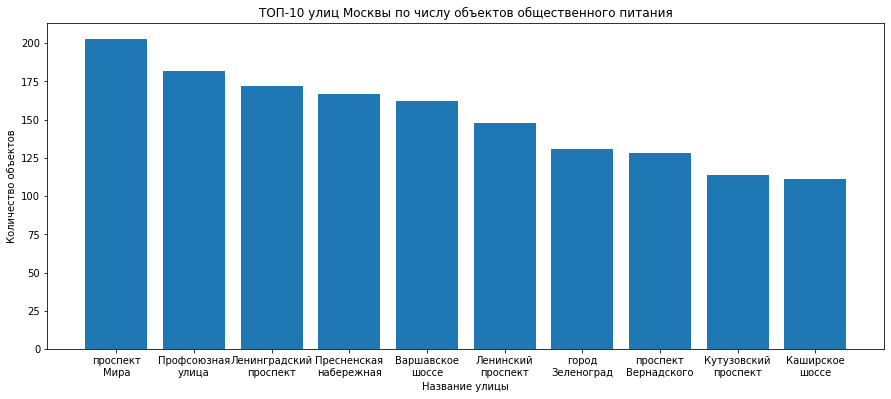

In [133]:
top10_street = top10_street.reset_index()

fig = plt.figure(figsize=(15,6))
plt.bar(top10_street['street'], top10_street['id'])
plt.title('TOП-10 улиц Москвы по числу объектов общественного питания')
plt.xlabel('Название улицы')
plt.ylabel('Количество объектов')
old_ticks, old_labels = plt.xticks() 

fig.canvas.draw()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels])
plt.show();

Из графика видно, лидером Топ-10 по числу заведений общественного питания города Москва стал проспект Мира (204 объекта), далее Профсоюзная улица (183), примерно на одном уровне Ленинградский проспект (173), Пресненская набережная (167) и Варшавское шоссе (162). Замыкают Топ-10 улицы Кутузовский проспект и Каширское шоссе (немного больше 100 заведений).

Определим район Москвы по улицам, вошедшим в Топ-10.

In [134]:
#подгрузим внешние данные с сайта https://data.mos.ru/ о районах Москвы
from io import BytesIO
import requests
spreadsheet_id = '1o0Rmxii5snYG8fk0Q81p9D5F9bZyslSPOGci7lpQ1Po'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
#удалим лишние столбцы
df = df.drop(columns=['areaid', 'okrug'])
df.columns=['street', 'area']
df.duplicated().sum()
df

,street,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район
...,...,...
4427,село Былово,село Былово
4428,улица 1-й километр Объездной Дороги,Клёновское поселение
4429,Новобутовский проезд,Район Южное Бутово
4430,Новохорошёвский проезд,Район Хорошево-Мневники


In [135]:
#обнаружили и удалили явняе дубликаты -8 строк
df = df.drop_duplicates()

In [136]:
#создаем новую таблицу топ-10 с районами
top10_area = top10_street.merge(df, on='street', how='left')
top10_area

,index,street,id,area
0,0,проспект Мира,203,Алексеевский район
1,0,проспект Мира,203,Ярославский Район
2,0,проспект Мира,203,Район Марьина роща
3,0,проспект Мира,203,Останкинский район
4,0,проспект Мира,203,Район Ростокино
5,0,проспект Мира,203,Район Свиблово
6,0,проспект Мира,203,Мещанский район
7,1,Профсоюзная улица,182,Академический район
8,1,Профсоюзная улица,182,Район Черемушки
9,1,Профсоюзная улица,182,Район Ясенево


Топ-10 улиц проходят через 48 районов Москвы...Сгруппируем для точности...

In [137]:
top10_area.groupby('area').agg({'street':'count'}).sort_values(by='street', ascending=False).reset_index()

,area,street
0,Район Проспект Вернадского,2
1,Донской район,2
2,Ломоносовский район,2
3,Обручевский район,2
4,Район Нагатино-Садовники,2
5,Район Теплый Стан,2
6,Район Тропарево-Никулино,2
7,Район Гагаринский,2
8,Район Фили-Давыдково,1
9,Район Ростокино,1


Топ-10 улиц проходят через 40 районов Москвы! В некоторых районах встречается по 2 улицы из Топа.

<a id='the_destination8'></a>
#### Составим список улиц с одним объектом общественного питания

In [138]:
alone_street = rest_data.groupby('street').agg({'id':'count'}).query('id == 1')
alone_street

,id
street,
,1
1-й Балтийский переулок,1
1-й Басманный переулок,1
1-й Ботанический проезд,1
1-й Вешняковский проезд,1
...,...
улица Шеногина,1
улица Шумилова,1
улица Шумкина,1


На 602 улице только один объект общественного питания.

In [139]:
alone_area = alone_street.merge(df, on='street', how='left')
alone_area

,street,id,area
0,,1,NaN
1,1-й Балтийский переулок,1,Район Аэропорт
2,1-й Басманный переулок,1,Басманный район
3,1-й Басманный переулок,1,Красносельский район
4,1-й Ботанический проезд,1,Район Свиблово
...,...,...,...
644,улица Шеногина,1,Район Хорошево-Мневники
645,улица Шумилова,1,Район Кузьминки
646,улица Шумкина,1,Район Сокольники
647,улица Щорса,1,Район Солнцево


In [140]:
alone_area = alone_area.groupby('area').agg({'street':'count'}).sort_values(by='street', ascending=False).reset_index()
alone_area

,area,street
0,Таганский район,28
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,20
...,...,...
101,Район Метрогородок,1
102,Район Москворечье-Сабурово,1
103,Московский район,1
104,Район Нагатино-Садовники,1


В 106 районах Москвы проходят улицы, на которых находится только один объект общественного питания. В нескольких районах проходит несколько улиц с одним заведением.

Проверим совпадают ли районы, где много заведений общепата и где мало...

In [141]:
alone_area[alone_area['area'].isin(top10_area['area'])]['area'].unique()

array(['Пресненский район', 'Район Марьина роща', 'Мещанский район',
       'Район Якиманка', 'Район Южное Бутово', 'Район Аэропорт',
       'Алексеевский район', 'Донской район', 'Район Ясенево',
       'Хорошевский район', 'Район Ростокино', 'Район Сокол',
       'Район Свиблово', 'Нагорный район', 'Район Дорогомилово',
       'Район Раменки', 'Ярославский Район', 'Район Беговой',
       'Останкинский район', 'Район Черемушки', 'Район Фили-Давыдково',
       'Район Коньково', 'Район Северное Бутово', 'Район Гагаринский',
       'Район Крюково', 'Район Чертаново Южное',
       'Район Чертаново Северное', 'Обручевский район',
       'Район Матушкино-Савелки', 'Район Москворечье-Сабурово',
       'Район Нагатино-Садовники'], dtype=object)

In [142]:
top_to_alone = top10_area.merge(alone_area, on='area', how='inner')
top_to_alone

,index,street_x,id,area,street_y
0,0,проспект Мира,203,Алексеевский район,7
1,0,проспект Мира,203,Ярославский Район,3
2,0,проспект Мира,203,Район Марьина роща,19
3,0,проспект Мира,203,Останкинский район,3
4,0,проспект Мира,203,Район Ростокино,5
5,0,проспект Мира,203,Район Свиблово,4
6,0,проспект Мира,203,Мещанский район,15
7,1,Профсоюзная улица,182,Район Черемушки,2
8,1,Профсоюзная улица,182,Район Ясенево,5
9,1,Профсоюзная улица,182,Район Коньково,2


In [143]:
top_to_alone = top_to_alone.groupby('area').agg({'street_y':'count'}).sort_values(by='street_y', ascending=False)
top_to_alone

,street_y
area,
Район Нагатино-Садовники,2
Район Гагаринский,2
Донской район,2
Обручевский район,2
Район Свиблово,1
Район Северное Бутово,1
Район Сокол,1
Район Фили-Давыдково,1
Район Черемушки,1


31 совпадение! Исключим эти районы из списка районов, где улицы с одним заведением.

In [144]:
alone_area.query('area not in @top_to_alone.index').reset_index()

,index,area,street
0,0,Таганский район,28
1,1,Район Хамовники,26
2,2,Басманный район,25
3,3,Тверской район,20
4,6,Район Арбат,18
...,...,...,...
70,98,Алтуфьевский район,1
71,99,Район Марьино,1
72,101,Район Метрогородок,1
73,103,Московский район,1


In [145]:
alone_area.query('area not in @top_to_alone.index' and 'street == 1').reset_index()

,index,area,street
0,83,Район Ивановское,1
1,84,Район Капотня,1
2,85,Район Западное Дегунино,1
3,86,Район Гагаринский,1
4,87,Район Восточный,1
5,88,Район Южное Медведково,1
6,89,Район Крюково,1
7,90,Район Левобережный,1
8,91,Район Чертаново Южное,1
9,92,Район Чертаново Северное,1


Таким образом, выделили 75 районов города Москвы, где проходит улица с одним заведением общественного питания и только 23 района, где только одно заведение общественного питания.

<a id='the_destination9'></a>
### Общий вывод и рекомендации

Исследование целесообразности открытия оригинального кафе в Москве. Фишка кафе - посетителей будут обслуживать роботы. Необходимо привлечение инвесторов.

**Цель исследования** - изучение и анализ текущего рынка общественного питания Москвы - достигнута.  
Были изучены открытые данные города Москва.  
Данные содержат таблицу rest_data, состоящую из нескольких колонок:  
id — идентификатор объекта;  
object_name — название объекта общественного питания;  
chain — сетевой ресторан;  
object_type — тип объекта общественного питания;  
address — адрес;  
number — количество посадочных мест.  
Тип заголовков одинаковый, приемлемый. Тип данных соответствующий набору данных.  
Пропущенные значения и дубликаты отсутствуют.  
Анализ данных показал:
1. Большую долю среди всех типов заведений общественного питания Москвы занимает - кафе. На втором месте столовая, с небольшим отрывом на третьем - рестораны. Меньше всего кулинарии и закусочные.  
2. 81% заведений Москвы - несетевые. Доля сетевых, соответственно, всего 19%.
3. Сетевое распространение с наибольшей долей характерно для кафе (47%), бистро (27%) и ресторанов (18%).  
Для сетевых заведений характерно много заведений с небольшим числом посадочных мест (от 40 до 50 в среднем). Исключение - рестораны, в среднем 100 мест на объект, но по распространенности ресторан только на третьем месте среди сетевых объектов.
4. Среди всех объектов общественного питания наибольшее число посадочных мест в среднем предоставляет столовая и ресторан (более 100). Лидер по числу объектов - кафе, только на 5 месте по числу посадочных мест (до 40).
5. Лидером Топ-10 улиц по числу заведений общественного питания города Москва стал проспект Мира (204 объекта), далее Профсоюзная улица (183), примерно на одном уровне Ленинградский проспект (173), Пресненская набережная (167) и Варшавское шоссе (162). Замыкают Топ-10 улицы Кутузовский проспект и Каширское шоссе (немного больше 100 заведений). Топ-10 улиц проходят через 40 районов Москвы! В некоторых районах встречается по 2 улицы из Топа.
6. На 601 улице только один объект общественного питания. В 106 районах Москвы проходят улицы, на которых находится только один объект общественного питания. В нескольких районах проходит несколько улиц с одним заведением. 
Также выявили 31 совпадение районов из Топ-10 и где улицы с одним заведением. Исключили их из списка районов, где проходят улицы с одним заведением общественного питания. 
Таким образом, выделили 75 районов города Москва, где проходит улица с одним заведением общественного питания и только 23 района, где только одно заведение общественного питания.

Из подведённых итогов можно рекомендовать:
1. Выбрать тип заведения общественного питания - кафе, ввиду его широкой распространенности, а значит популярности.
2. Количество посадочных мест - до 50.
3. Район расположения - из ТОП-10. Вероятно, фишка кафе - официант-робот отвлечет на себя посетителей конкурентов.
4. Возможность развития сети - положительная (кафе, как сетевой объект имеет высокую долю распространенности).

[Вернуться в начало!](#the_destination10) 